In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Exploration

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('Loan-approval-prediction.csv')

In [5]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
#drop 'id' feature - not useful in prediction
df = df.drop(columns = 'id')

In [7]:
#Lets print all catagorical feature's unique values
cat_f = df.select_dtypes(include = 'object').columns.tolist()
cat_f

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [8]:
def unique_val(df, cat_f):
    for col in cat_f:
       # print(f"{col}:")
        print(f"{col}: {df[col].unique()}")
        print("----------------------------")


In [9]:
unique_val(df, cat_f)

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
----------------------------
loan_intent: ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
----------------------------
loan_grade: ['B' 'C' 'A' 'D' 'E' 'F' 'G']
----------------------------
cb_person_default_on_file: ['N' 'Y']
----------------------------


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [ ]:
df.describe()

## Check for NaN

In [11]:
num_of_nan = df.isnull().sum().sum()
print(num_of_nan)

0


## Outlier Detection and Handling

In [13]:
#Handling outliers
num_f = df.select_dtypes(include = 'number').columns.tolist()
num_f

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_status']

In [14]:
def numeric_features(df, num_f):
    num_features = []
    for col in num_f:
        if df[col].nunique() > 2:
            num_features.append(col)
    return num_features

In [15]:
num_f = numeric_features(df, num_f)
num_f

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [16]:
#visualize outliers
def box_plot(df, num_f):
    for col in num_f:
        plt.title(f"{col}")
        sns.boxplot(x = df[col])
        plt.show()

## Visualizing Outliers

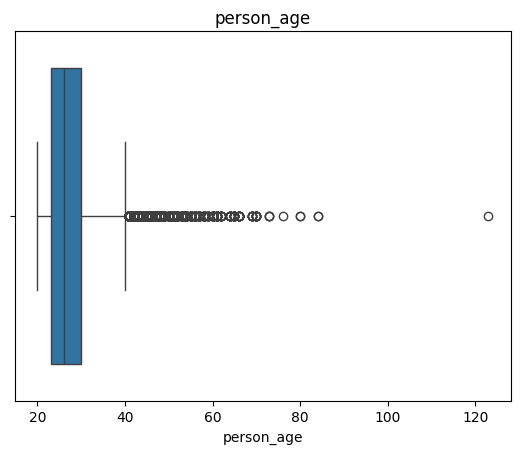

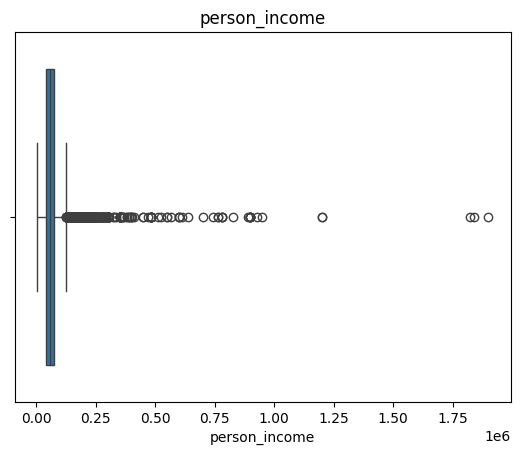

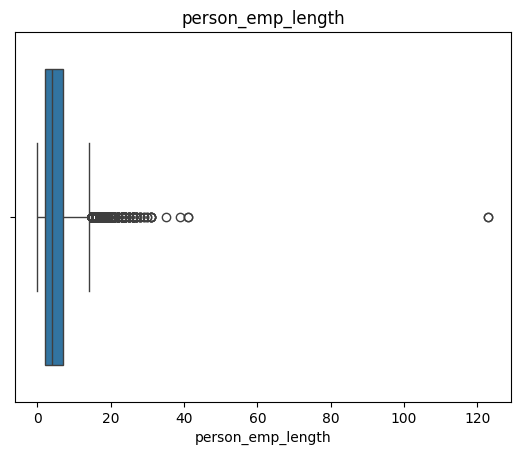

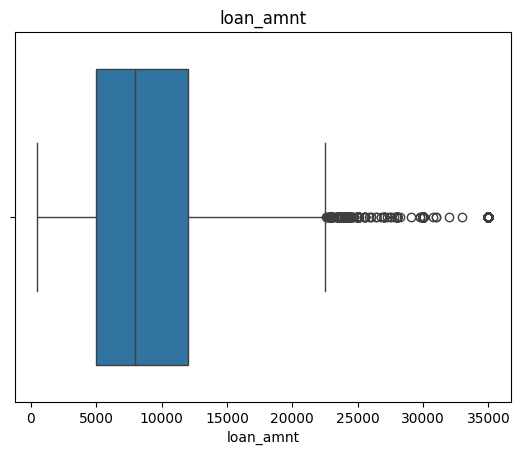

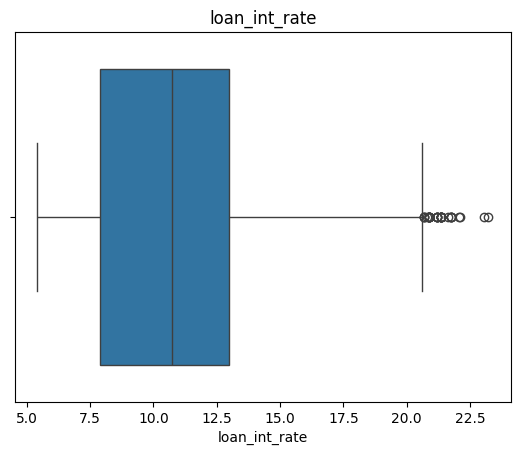

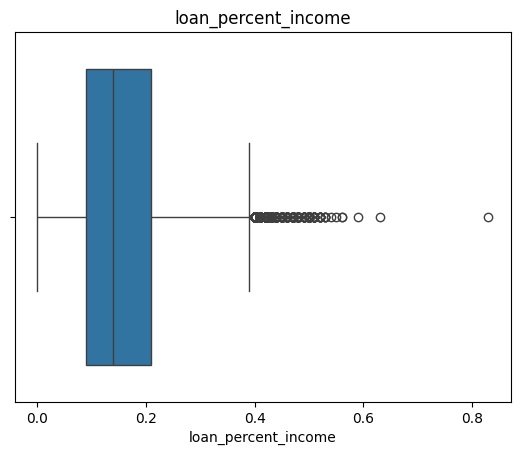

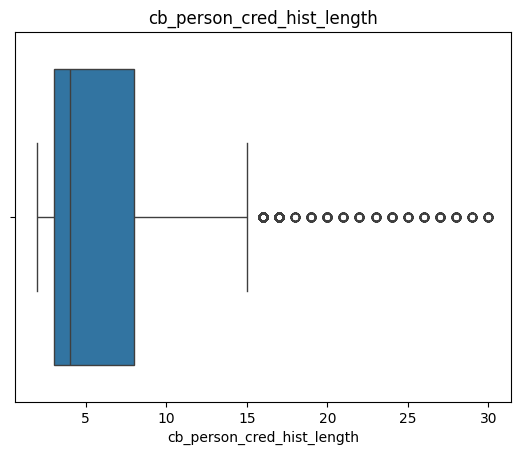

In [17]:
box_plot(df, num_f)

## Capping Outliers

In [18]:
def cap_outlier(df, col, lower_limit = 0.01, upper_limit = 0.99):
    lower = df[col].quantile(lower_limit)
    upper = df[col].quantile(upper_limit)
    df[col] = df[col].clip(lower, upper)
    return df

for col in num_f:
    cap_outlier(df, col, lower_limit = 0.01, upper_limit = 0.99)
                          

C:\Users\ADVANCE COMPUTERS\AppData\Local\Temp\ipykernel_4328\278890713.py:4: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].clip(lower, upper)


## Check for Skew

In [19]:
#check for skew
def check_skew(df, num_f):
    for col in num_f:
        print(f"{col} : {(df[col].skew()):.3f}")

In [20]:
check_skew(df, num_f)

person_age : 1.499
person_income : 1.297
person_emp_length : 0.958
loan_amnt : 1.008
loan_int_rate : 0.144
loan_percent_income : 0.830
cb_person_cred_hist_length : 1.204


## Log Transform

In [21]:
#handle skew - transform
def transform(df, num_f):
    for col in num_f:
        if df[col].skew() > 0.5 or df[col].skew() < -0.5:
            df[col] = np.log1p(df[col])
        

In [22]:
transform(df, num_f)

In [23]:
check_skew(df, num_f)

person_age : 1.038
person_income : 0.129
person_emp_length : -0.504
loan_amnt : -0.425
loan_int_rate : 0.144
loan_percent_income : 0.667
cb_person_cred_hist_length : 0.407


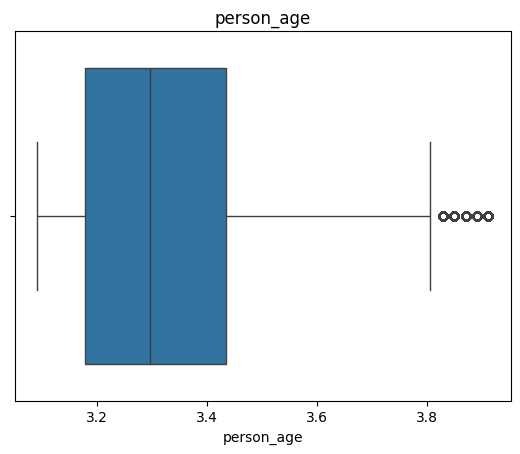

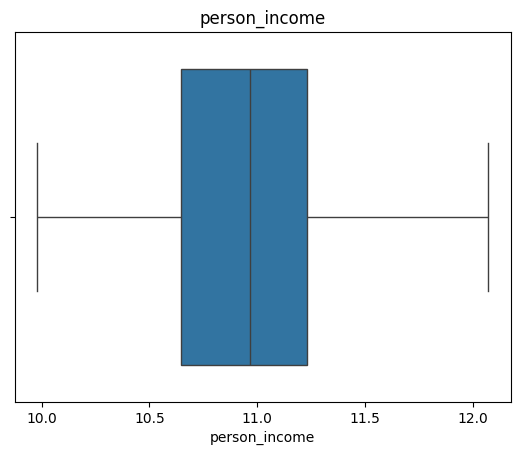

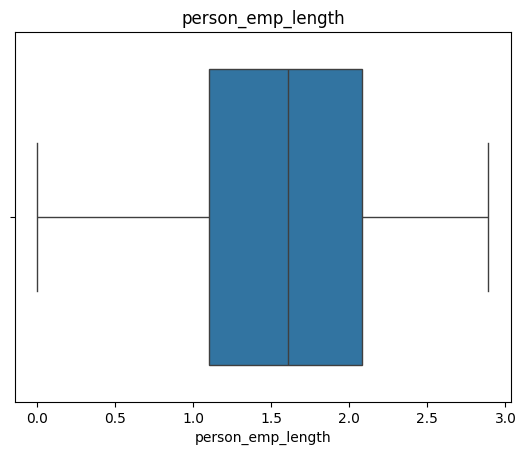

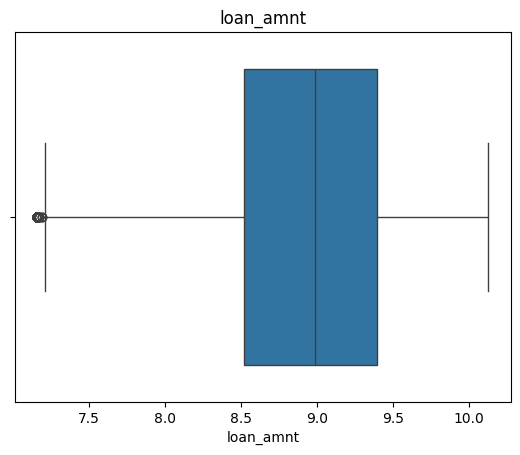

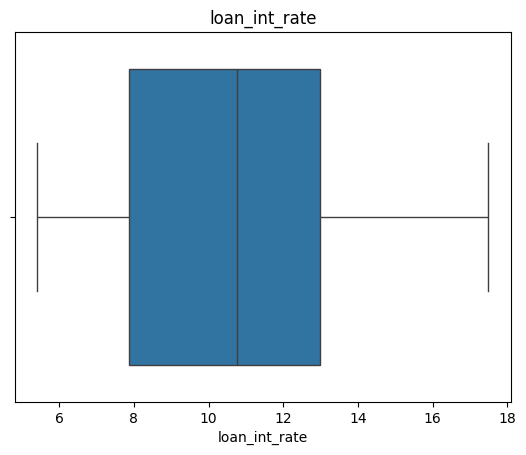

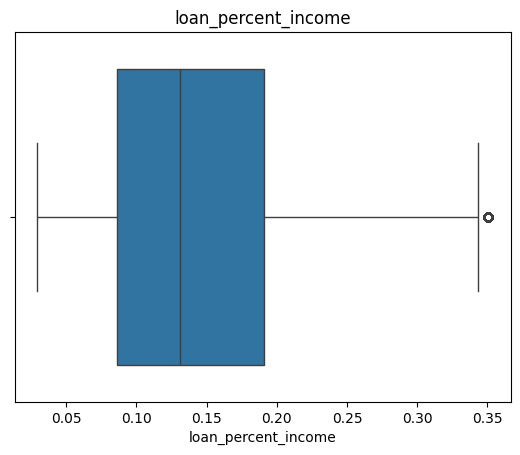

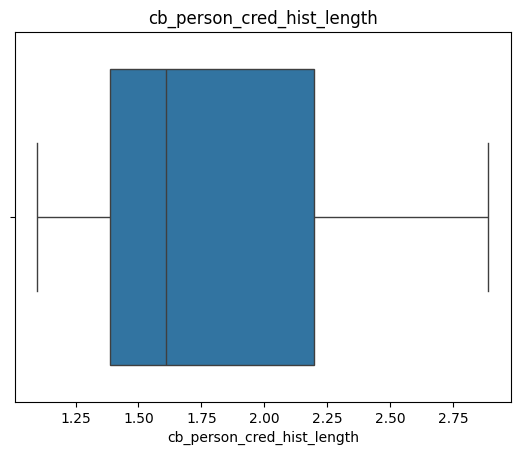

In [24]:
box_plot(df, num_f)

## Distribution Analysis

In [25]:
def visualize_distribution(df, num_f):
    for col in num_f:
        sns.histplot(df, x = col, bins = 20, kde = True)
        plt.show()

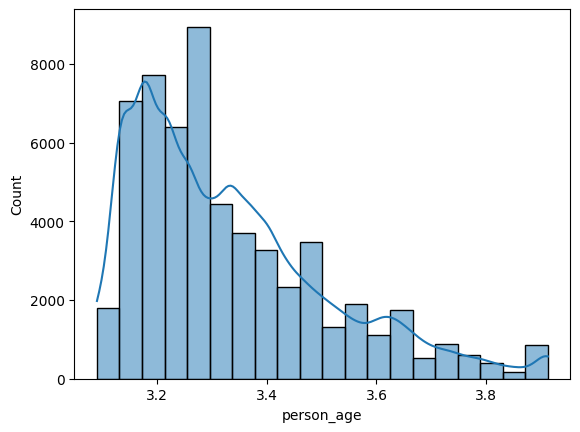

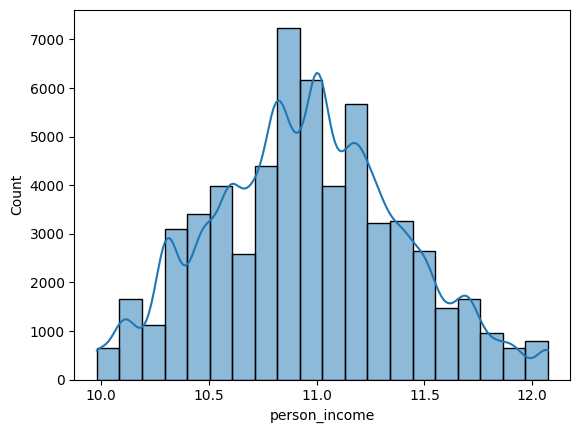

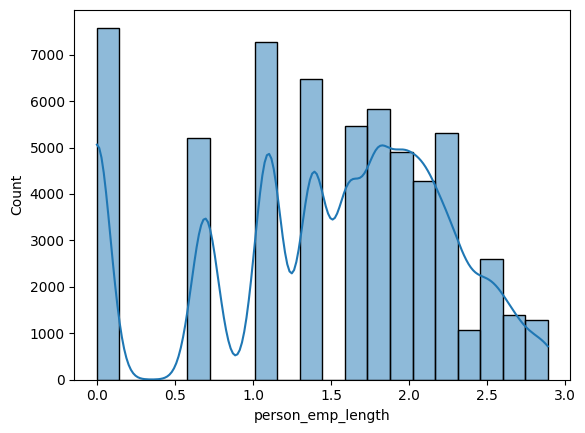

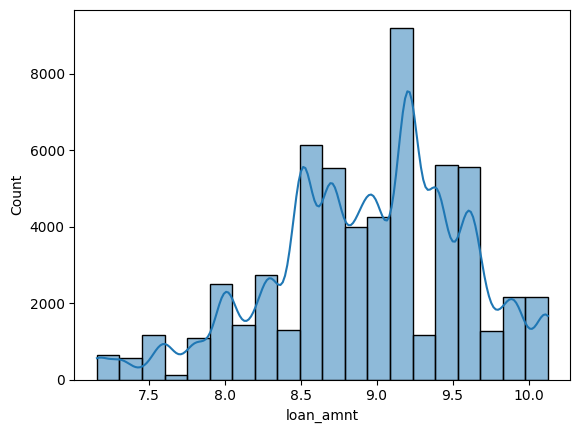

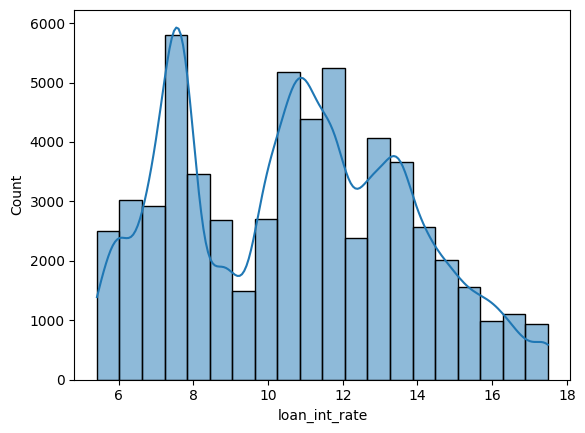

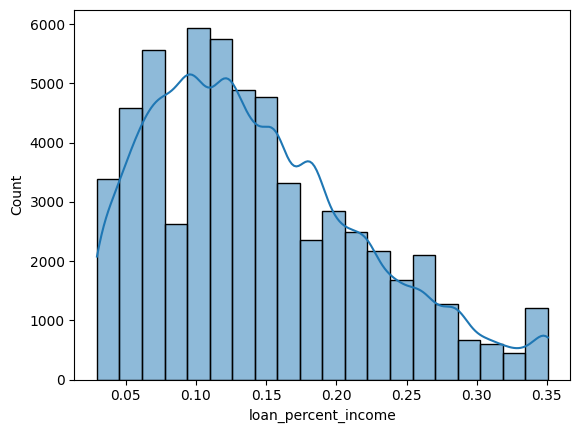

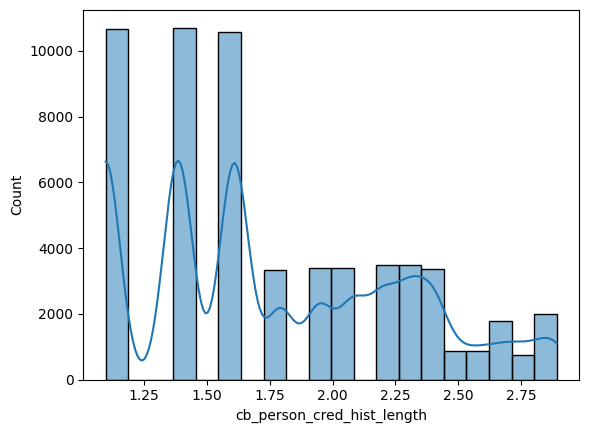

In [26]:
visualize_distribution(df, num_f)

## Correlation Analysis

In [27]:
def check_corr(df, num_f):
    target = 'loan_status'
    corrs = []
    for col in num_f:
        corr = df[[col , target]].corr().values[0][1]
        print(f"{col} : {corr}")
        corrs.append(corr)
    return corrs
    
    

num_corrs = check_corr(df, num_f)

person_age : -0.00588653738057688
person_income : -0.2360301097977938
person_emp_length : -0.11547246544330882
loan_amnt : 0.12087574053866748
loan_int_rate : 0.3369527353355152
loan_percent_income : 0.3655634262734007
cb_person_cred_hist_length : -0.010533051537207174


## Dropping low Correlation Features

In [28]:
def drop_low_corr(df, num_f):
    target = 'loan_status'
    drop_col = []
    new_num_f = []
    for col in num_f:
        corr = corr = df[[col , target]].corr().values[0][1]
        if (0.1 <= corr <= 1) or (-1 <= corr <= -0.1):
            new_num_f.append(col)
        else:
            drop_col.append(col)
    return df.drop(columns = drop_col), new_num_f
            
    

In [29]:
df, new_num_f = drop_low_corr(df, num_f)

In [30]:
new_num_f

['person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income']

In [31]:
df

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,loan_status
0,10.463132,RENT,0.000000,EDUCATION,B,8.699681,11.49,0.157004,N,0
1,10.933125,OWN,1.945910,MEDICAL,C,8.294300,13.35,0.067659,N,0
2,10.268165,OWN,2.197225,PERSONAL,A,8.699681,8.90,0.190620,N,0
3,11.156265,RENT,2.708050,VENTURE,B,9.392745,11.11,0.157004,N,0
4,11.002117,RENT,1.098612,MEDICAL,A,8.699681,6.92,0.095310,N,0
...,...,...,...,...,...,...,...,...,...,...
58640,11.695255,MORTGAGE,1.791759,EDUCATION,D,10.126671,15.95,0.190620,Y,0
58641,10.268165,RENT,0.000000,MEDICAL,C,9.210440,12.73,0.300105,N,1
58642,10.691968,RENT,2.079442,EDUCATION,D,8.824825,16.00,0.139762,N,1
58643,10.308986,RENT,1.098612,EDUCATION,A,8.517393,8.90,0.157004,N,0


## Scale Numeric Features

In [33]:
def standardize(X):
    mean = X.mean()
    std = X.std()
    return (X - mean)/std


In [34]:
for col in new_num_f:
    df[col] = standardize(df[col])

In [35]:
unique_val(df, cat_f)

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
----------------------------
loan_intent: ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
----------------------------
loan_grade: ['B' 'C' 'A' 'D' 'E' 'F' 'G']
----------------------------
cb_person_default_on_file: ['N' 'Y']
----------------------------


## Encoding Catagorical Data

In [36]:
dict1 = {'N':0, 'Y':1}
dict2 = {'A':0, 'B':1, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

In [37]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map(dict1)
df['loan_grade'] = df['loan_grade'].map(dict2)

In [38]:
df = pd.get_dummies(df, columns = ['person_home_ownership', 'loan_intent'], drop_first = True, dtype = int)

In [39]:
df

,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-1.117788,-1.901439,1,-0.383081,0.273512,0.164034,0,0,0,0,1,1,0,0,0,0
1,-0.053389,0.604753,3,-1.023235,0.891954,-1.015089,0,0,0,1,0,0,0,1,0,0
2,-1.559331,0.928428,0,-0.383081,-0.587651,0.607686,0,0,0,1,0,0,0,0,1,0
3,0.451959,1.586334,1,0.711365,0.147164,0.164034,0,0,0,0,1,0,0,0,0,1
4,0.102857,-0.486505,0,-0.383081,-1.245992,-0.650161,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1.672617,0.406218,4,1.870337,1.756443,0.607686,1,0,0,0,0,1,0,0,0,0
58641,-1.559331,-1.901439,3,0.423480,0.685807,2.052593,0,1,0,0,1,0,0,1,0,0
58642,-0.599541,0.776732,4,-0.185461,1.773067,-0.063513,0,1,0,0,1,1,0,0,0,0
58643,-1.466884,-0.486505,0,-0.670939,-0.587651,0.164034,0,0,0,0,1,1,0,0,0,0


## Check Class Imbalance

In [40]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Class Imbalance')

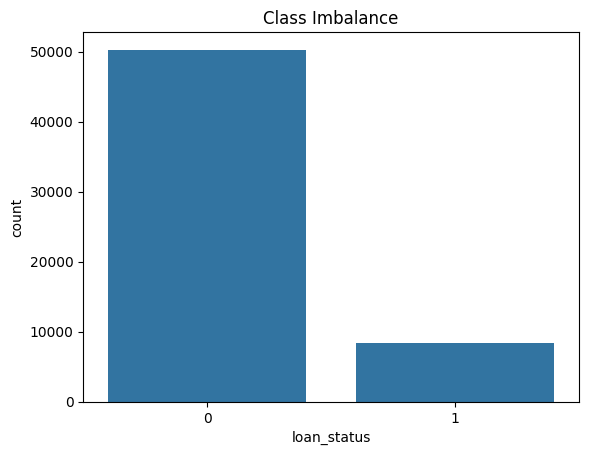

In [61]:
sns.countplot(df, x = 'loan_status')
plt.title('Class Imbalance')

## Split Dataset

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop(columns = 'loan_status')
y = df['loan_status']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Train Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression(class_weight = 'balanced', max_iter=1000)

In [47]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [48]:
y_pred = model.predict(X_test)

## Evaluation

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88     10087
           1       0.41      0.85      0.56      1642

    accuracy                           0.81     11729
   macro avg       0.69      0.83      0.72     11729
weighted avg       0.89      0.81      0.83     11729



Text(0.5, 1.0, 'Confusion Matrix')

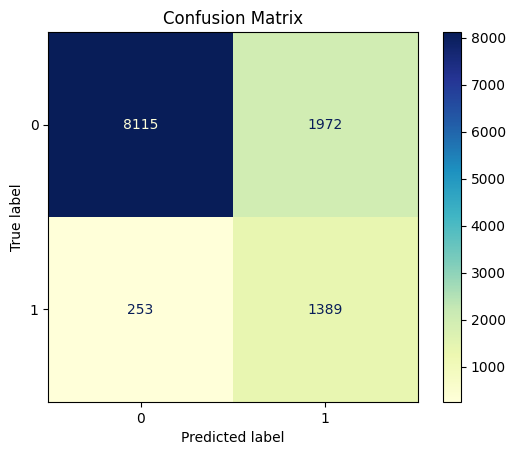

In [51]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, )
disp.plot(cmap = 'YlGnBu')
plt.title("Confusion Matrix")
#plt.grid(False)

## Rectifying  class Imbalance

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
smote = SMOTE(random_state = 42)

In [55]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [56]:
model.fit(X_train_sm, y_train_sm)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [57]:
y_pred_new = model.predict(X_test)

## Revaluation

In [58]:
# Evaluate
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     10087
           1       0.42      0.83      0.55      1642

    accuracy                           0.81     11729
   macro avg       0.69      0.82      0.72     11729
weighted avg       0.89      0.81      0.84     11729



Text(0.5, 1.0, 'Confusion Matrix')

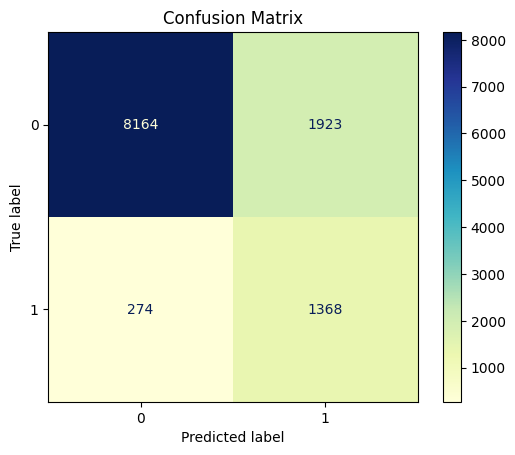

In [60]:
cm = confusion_matrix(y_test, y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, )
disp.plot(cmap = 'YlGnBu')
plt.title("Confusion Matrix")